In [7]:
from lib.helpers import *
from qiskit.visualization import plot_coupling_map, plot_circuit_layout
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
import numpy as np
import matplotlib as mpl

In [8]:
service = get_qiskit_runtime_service('provider')

Qiskit Account loaded successfully. 
Channel:	ibm_quantum
Instance:	ibm-q/open/main


In [9]:
backend = service.get_backend('ibm_brisbane')

In [10]:
q_coords = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [1, 0], [1, 4], [1, 8], [1, 12], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [3, 2], [3, 6], [3, 10], [3, 14], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [5, 0], [5, 4], [5, 8], [5, 12], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [
    6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [7, 2], [7, 6], [7, 10], [7, 14], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [9, 0], [9, 4], [9, 8], [9, 12], [10, 0], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10], [10, 11], [10, 12], [10, 13], [10, 14], [11, 2], [11, 6], [11, 10], [11, 14], [12, 1], [12, 2], [12, 3], [12, 4], [12, 5], [12, 6], [12, 7], [12, 8], [12, 9], [12, 10], [12, 11], [12, 12], [12, 13], [12, 14]]

In [20]:
mpl.font_manager.FontManager().findfont('IBM Plex Sans')
# mpl.font_manager.findfont()

mpl.font_manager.fontManager.addfont(
    mpl.font_manager.FontManager().findfont('IBM Plex Sans'))

In [21]:
nodes = [x for x in backend.coupling_map.shortest_undirected_path(0, 126)]

path = []
for node in range(len(nodes) - 1):
    path.append(set((nodes[node], nodes[node + 1])))

path

[{0, 14},
 {14, 18},
 {18, 19},
 {19, 20},
 {20, 33},
 {33, 39},
 {39, 40},
 {40, 41},
 {41, 53},
 {53, 60},
 {60, 61},
 {61, 62},
 {62, 72},
 {72, 81},
 {81, 82},
 {82, 83},
 {83, 92},
 {92, 102},
 {102, 103},
 {103, 104},
 {104, 111},
 {111, 122},
 {122, 123},
 {123, 124},
 {124, 125},
 {125, 126}]

In [22]:
set(path[0]) == set({14, 0})

True

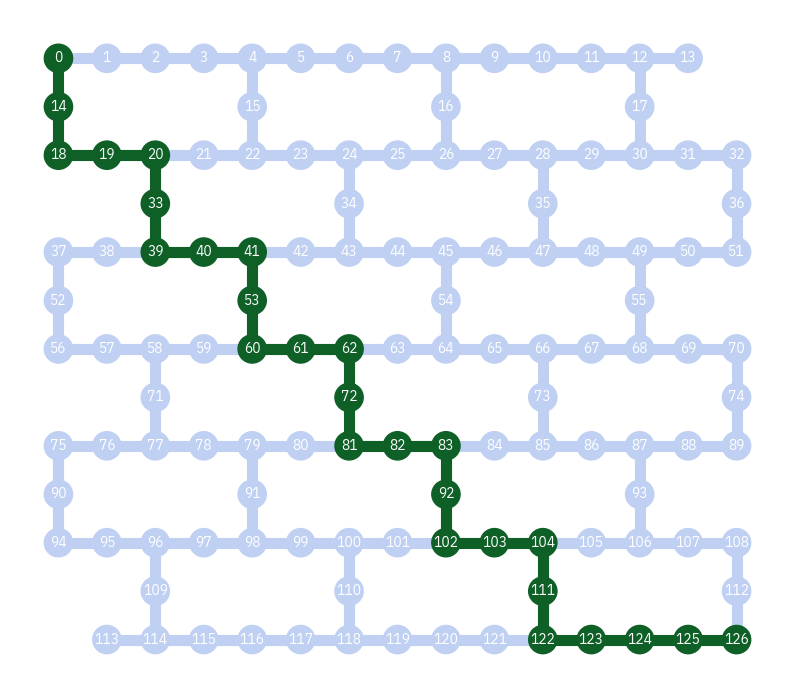

In [23]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IBM Plex Sans'
# mpl.rcParams["font.weight"] = "normal"
colors = []
edges = []
magenta = np.array([14, 96, 39, 255]) / 255
blue = np.array([191, 208, 243, 255]) / 255


for i in range(127):
    if (i in nodes):
        colors.append(magenta)
    else:
        colors.append(blue)

for edge in backend.coupling_map:

    if (set(edge) in path):
        edges.append(magenta)
    else:
        edges.append(blue)

# ax = plt.gca()

plot_coupling_map(coupling_map=[x for x in backend.coupling_map],  qubit_coordinates=q_coords, num_qubits=127, plot_directed=False, label_qubits=True, figsize=(
    10, 10), qubit_color=colors, line_color=edges, line_width=8, font_size=15, filename='coupling_map_127-visited-qubits.eps')

No path provided, building path
-build_path
Path Nodes:	%s NodeIndices[0, 14, 18, 19, 20, 33, 39, 40, 41, 53, 60, 61, 62, 72, 81, 82, 83, 92, 102, 103, 104, 111, 122, 123, 124, 125, 126]
Path length:	%s 27
-build_circuits
Skipping: Topological length must be at least 8
Skipping: Topological length must be at least 8
Skipping: Topological length must be at least 8
Skipping: Topological length must be at least 8
Skipping: Topological length must be at least 8
Skipping: Topological length must be at least 8
Experiment 0:
                    ┌───┐      ┌─┐                                           
q_0: ────────────■──┤ H ├─■────┤M├───────────────────────────────────────────
     ┌───┐     ┌─┴─┐└───┘ │ ┌─┐└╥┘                                           
q_1: ┤ H ├──■──┤ X ├──■───┼─┤M├─╫────────────────────────────────────────────
     └───┘┌─┴─┐└───┘┌─┴─┐ │ └╥┘ ║                                            
q_2: ─────┤ X ├─────┤ X ├─■──╫──╫──X─────────────────────────────────────────
        

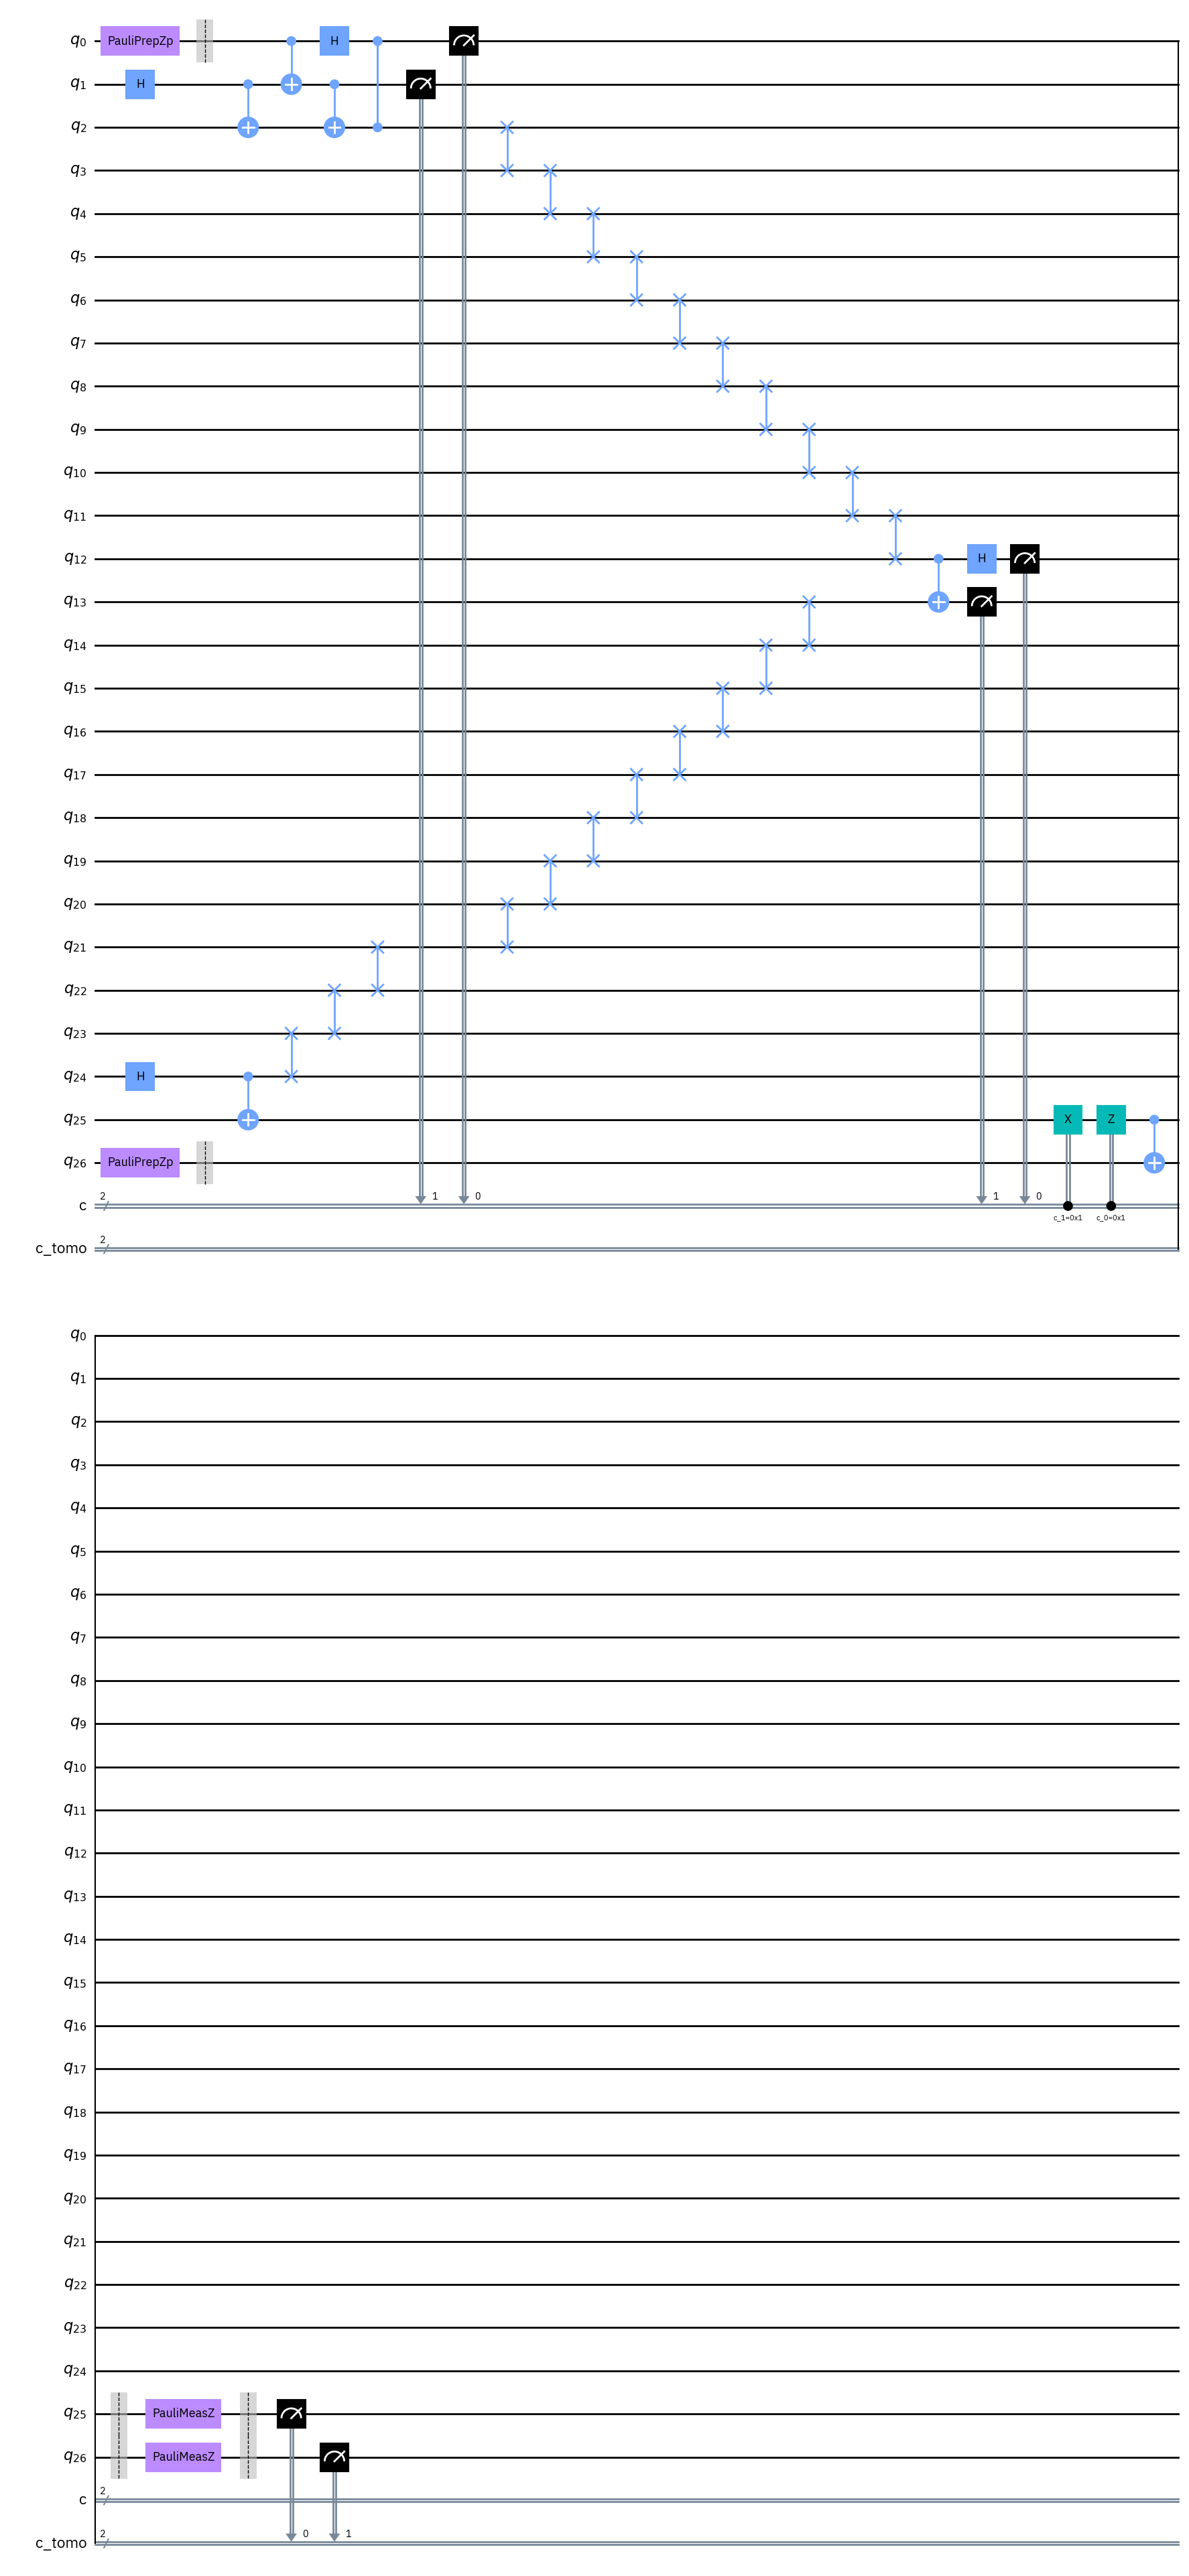

In [34]:
from lib.ent_swap_cnot_experiment import EntanglementSwappingCNOTExperimentsController


controller = EntanglementSwappingCNOTExperimentsController(
    backend=backend,
    shots=1024,
    path=None,
    simulator=service.get_backend('ibmq_qasm_simulator'),
    no_analysis=True
    # log=print
)


controller.build_circuits()[-1].circuits()[0].draw(output='mpl')

In [37]:
nodes[12], nodes[13]

(62, 72)

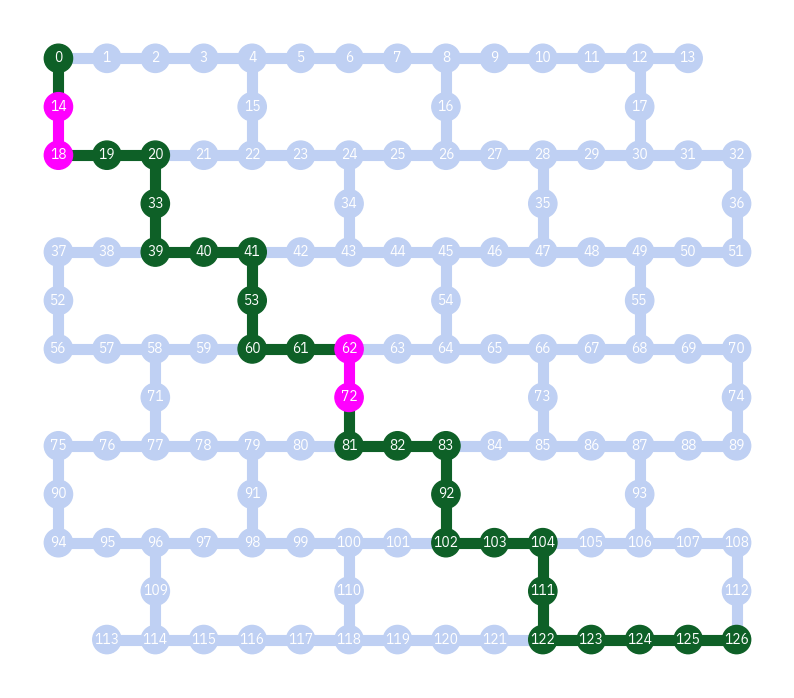

In [38]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IBM Plex Sans'
# mpl.rcParams["font.weight"] = "bold"
colors = []
edges = []
green = np.array([14, 96, 39, 255]) / 255
blue = np.array([191, 208, 243, 255]) / 255
magenta = np.array([255, 0, 255, 255]) / 255
magenta_2 = np.array([255, 0, 255, 255]) / 255


bell_qubits = [14, 18, 62, 72]
bell_connections = [set(x)
                    for x in [(14, 18), (18, 14), (62, 72), (72, 62)]]

bell_qubits_after = [14, 18, 62, 72]
bell_connections_after = [set(x)
                          for x in [(14, 18), (18, 14), (62, 72), (72, 62)]]
for i in range(127):

    if (i in bell_qubits):
        colors.append(magenta)
    elif (i in nodes):
        colors.append(green)
    else:
        colors.append(blue)

for edge in backend.coupling_map:
    if (set(edge) in bell_connections):
        edges.append(magenta)
    elif (set(edge) in path):
        edges.append(green)
    else:
        edges.append(blue)

# ax = plt.gca()

plot_coupling_map(coupling_map=[x for x in backend.coupling_map],  qubit_coordinates=q_coords, num_qubits=127, plot_directed=False, label_qubits=True, figsize=(
    10, 10), qubit_color=colors, line_color=edges, line_width=8, font_size=15, filename='coupling_map_127-visited-qubits.eps')